In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titres = ["MC.PA", "TTE.PA", "SU.PA", "OR.PA", "SAN.PA", "AIR.PA", "AI.PA", "SAF.PA", "BNP.PA", "RMS.PA"] #titres
data = yf.download(titres, start="2023-01-01", end="2024-01-01", interval="1d") #période et fréquence des données
portfolio_returns = data['Adj Close'].pct_change().mean(axis=1) #portfolio return

[*********************100%%**********************]  10 of 10 completed


In [3]:
data.head()

Price        Adj Close                                                 \
Ticker           AI.PA      AIR.PA     BNP.PA       MC.PA       OR.PA   
Date                                                                    
2023-01-02  130.707489  111.575645  48.110371  676.864258  322.794617   
2023-01-03  130.378311  112.242004  49.056286  685.348206  324.039490   
2023-01-04  133.883194  113.065147  51.070740  719.674194  341.036224   
2023-01-05  133.224823  112.888756  51.333496  710.312500  339.025360   
2023-01-06  136.787796  114.201874  51.771420  730.205933  343.382263   

Price                                                                  ...  \
Ticker           RMS.PA      SAF.PA     SAN.PA       SU.PA     TTE.PA  ...   
Date                                                                   ...   
2023-01-02  1454.282227  116.209328  84.858658  128.190796  55.699268  ...   
2023-01-03  1471.066162  115.679947  85.460297  129.311035  54.734138  ...   
2023-01-04  1533.265747  116.660278  85.404762  135.008835  53.453480  ...   
2023-01-05  1528.822754  116.464218  83.627617  134.834991  53.769005  ...   
2023-01-06  1571.276367  119.993439  84.340332  137.036850  54.455730  ...   

Price       Volume                                                            \
Ticker       AI.PA   AIR.PA   BNP.PA   MC.PA   OR.PA RMS.PA  SAF.PA   SAN.PA   
Date                                                                           
2023-01-02  584325   667019  1815541  194703  182912  32526  375130  1118828   
2023-01-03  748439  1101680  2816969  316482  317275  58975  601931  1793153   
2023-01-04  920791  1314343  4045737  570725  459088  68887  749997  1934459   
2023-01-05  848985   938465  2872672  327709  343397  49933  539669  1939509   
2023-01-06  764719   866818  2907109  318415  298828  64997  724545  1356767   

Price                         
Ticker        SU.PA   TTE.PA  
Date                          
2023-01-02   459599  3907873  
2023-01-03   734903  5540506  
2023-01-04  1110524  7364586  
2023-01-05   772250  5310799  
2023-01-06   706224  4484094  

[5 rows x 60 columns]

In [4]:
# benchmark (CAC 40)

benchmark = yf.download("^FCHI", start="2023-01-01", end="2024-01-01", interval="1d")
benchmark_returns = benchmark['Adj Close'].pct_change() #benchmark return

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Rendement cumulative pour obtenir les perfs cumulées

cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_benchmark_returns = (1 + benchmark_returns).cumprod() - 1

In [6]:
# Appliquons une pondération 

# Répartition égale de 10 % pour chaque titre
weights = np.array([0.10] * len(titres))

# performance annuelle (variation des prix sur l'année)
initial_prices = data['Adj Close'].iloc[0]
final_prices = data['Adj Close'].iloc[-1]
annual_performance = (final_prices - initial_prices) / initial_prices

# DataFrame
summary_df = pd.DataFrame({
    'Ticker': titres,
    'Poids (%)': weights * 100,
    'Performance Annuelle (%)': annual_performance * 100
})

#tableau récapitulatif
summary_df.reset_index(drop=True, inplace=True)
print(summary_df)

   Ticker  Poids (%)  Performance Annuelle (%)
0   MC.PA       10.0                 32.632104
1  TTE.PA       10.0                 24.512475
2   SU.PA       10.0                 21.887567
3   OR.PA       10.0                  7.361982
4  SAN.PA       10.0                 37.494335
5  AIR.PA       10.0                 31.144880
6   AI.PA       10.0                 35.837570
7  SAF.PA       10.0                  1.559654
8  BNP.PA       10.0                 39.715826
9  RMS.PA       10.0                  6.650468


In [7]:
# Performance finale du portefeuille et du benchmark en pourcentage
portfolio_performance_percent = cumulative_portfolio_returns.iloc[-1] * 100
benchmark_performance_percent = cumulative_benchmark_returns.iloc[-1] * 100

print(f"Performance du Portefeuille sur la période : {portfolio_performance_percent:.2f}%")
print(f"Performance du Benchmark (CAC 40) sur la période : {benchmark_performance_percent:.2f}%")

Performance du Portefeuille sur la période : 25.04%
Performance du Benchmark (CAC 40) sur la période : 14.38%


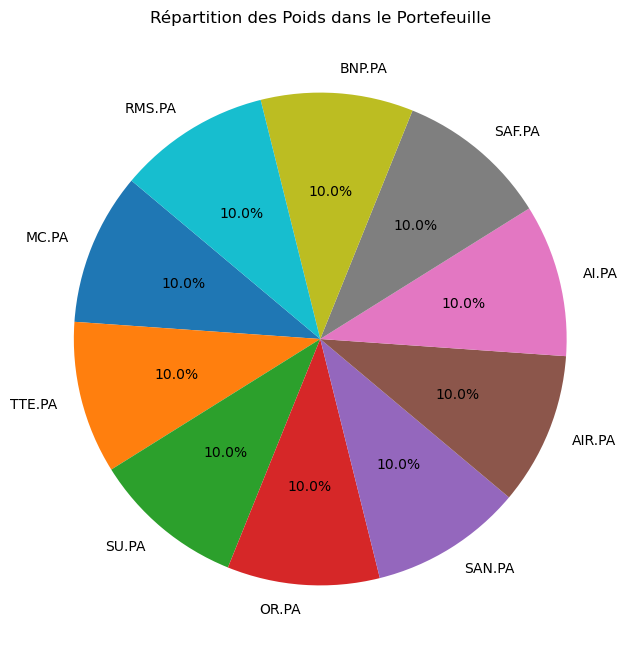

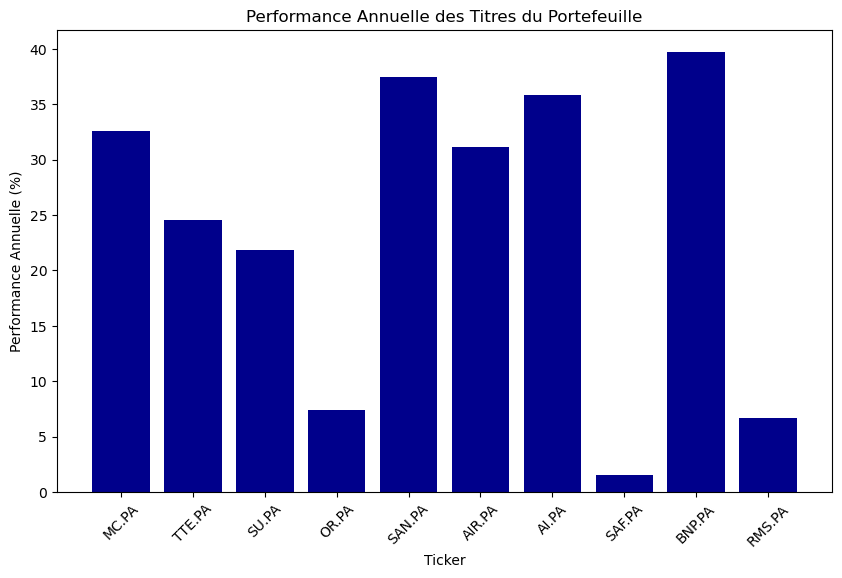

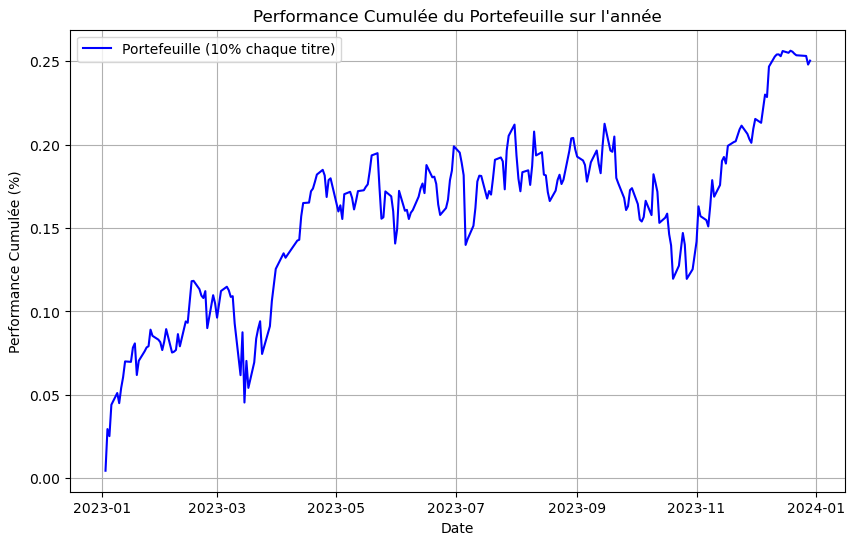

In [8]:
# 1. Diagramme circulaire pour la répartition des poids
plt.figure(figsize=(8, 8))
plt.pie(summary_df['Poids (%)'], labels=summary_df['Ticker'], autopct='%1.1f%%', startangle=140)
plt.title('Répartition des Poids dans le Portefeuille')
plt.show()

# 2. Diagramme en barres pour la performance annuelle
plt.figure(figsize=(10, 6))
plt.bar(summary_df['Ticker'], summary_df['Performance Annuelle (%)'], color='darkblue')
plt.title('Performance Annuelle des Titres du Portefeuille')
plt.xlabel('Ticker')
plt.ylabel('Performance Annuelle (%)')
plt.xticks(rotation=45)
plt.show()

# 3. Graphique de performance cumulée (si vous avez les rendements quotidiens)
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() - 1
plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative_returns, label='Portefeuille (10% chaque titre)', color='blue')
plt.title('Performance Cumulée du Portefeuille sur l\'année')
plt.xlabel('Date')
plt.ylabel('Performance Cumulée (%)')
plt.legend()
plt.grid(True)
plt.show()

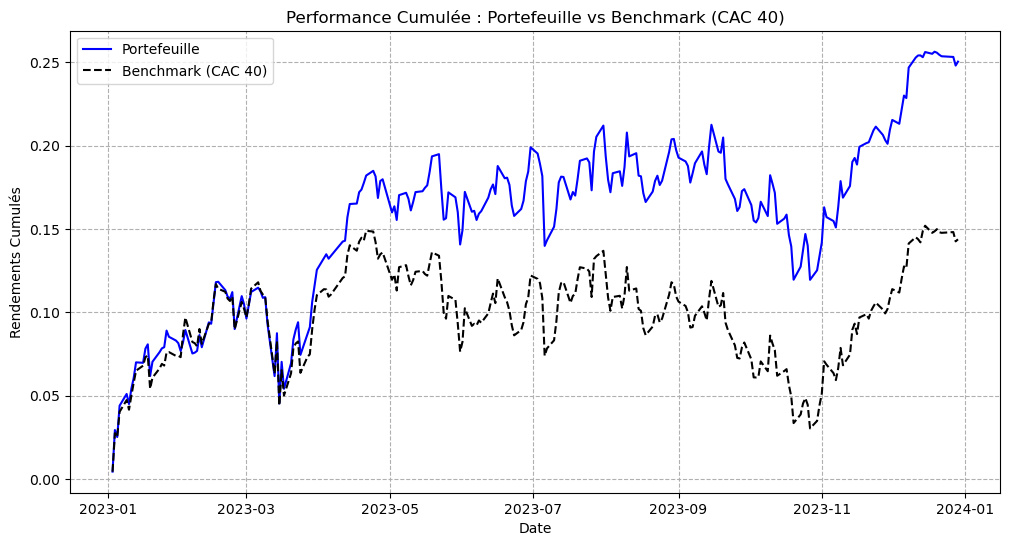

In [9]:
# Comparaison vs Benchmark

# Perf cumulées
plt.figure(figsize=(12, 6))
plt.plot(cumulative_portfolio_returns, label='Portefeuille', color='blue')
plt.plot(cumulative_benchmark_returns, label='Benchmark (CAC 40)', color='black', linestyle='--')
plt.title('Performance Cumulée : Portefeuille vs Benchmark (CAC 40)')
plt.xlabel('Date')
plt.ylabel('Rendements Cumulés')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

   Ticker  Contribution
0   MC.PA      3.263210
1  TTE.PA      2.451248
2   SU.PA      2.188757
3   OR.PA      0.736199
4  SAN.PA      3.749434
5  AIR.PA      3.114489
6   AI.PA      3.583757
7  SAF.PA      0.155965
8  BNP.PA      3.971583
9  RMS.PA      0.665046

La somme des contributions est : 23.879688


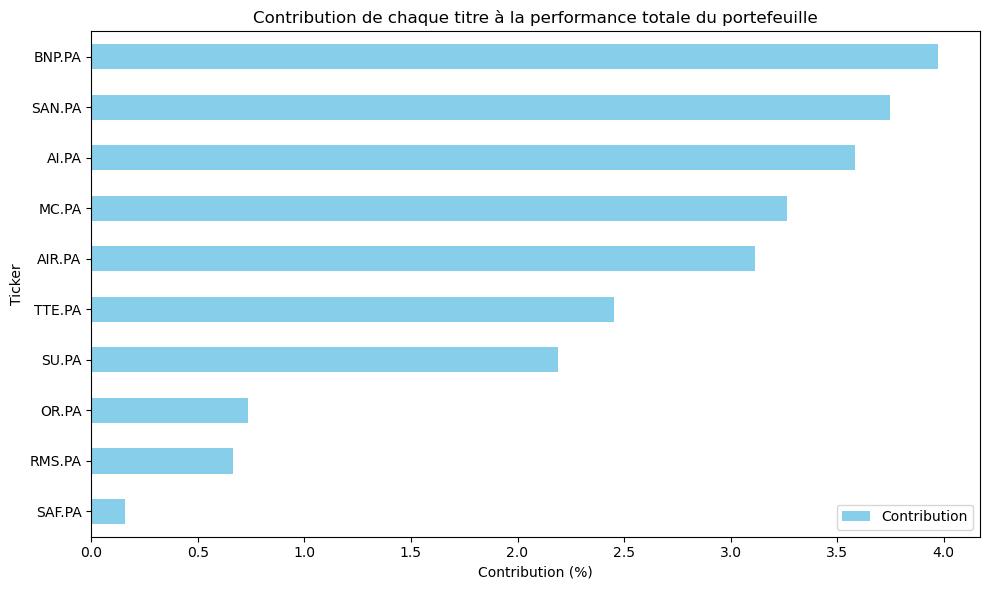

In [10]:
# Contribution de perf


# Ticker, Poids (%) et Performance Annuelle (%)
data = {
    'Ticker': ['MC.PA', 'TTE.PA', 'SU.PA', 'OR.PA', 'SAN.PA', 'AIR.PA', 'AI.PA', 'SAF.PA', 'BNP.PA', 'RMS.PA'],
    'Poids (%)': [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0],
    'Performance Annuelle (%)': [32.632104, 24.512475, 21.887567, 7.361992, 37.494335, 31.144891, 35.837570, 1.559654, 39.715826, 6.650461]
}

# Conversion en DataFrame
summary_df = pd.DataFrame(data)

# Calcul des contributions
summary_df['Contribution'] = (summary_df['Poids (%)'] / 100) * summary_df['Performance Annuelle (%)']

# Calcul de la somme des contributions
total_contribution = summary_df['Contribution'].sum()

# Affichage des contributions et de la somme totale
print(summary_df[['Ticker', 'Contribution']])
print(f"\nLa somme des contributions est : {total_contribution:.6f}")

# Diagramme en barres horizontales pour visualiser les contributions
fig, ax = plt.subplots(figsize=(10, 6))
summary_df.sort_values('Contribution', ascending=True).plot(kind='barh', x='Ticker', y='Contribution', ax=ax, color='skyblue')

# Ajouter des titres et des labels
ax.set_title('Contribution de chaque titre à la performance totale du portefeuille')
ax.set_xlabel('Contribution (%)')
ax.set_ylabel('Ticker')
ax.grid(False)

# Afficher le graphique
plt.tight_layout()
plt.show()

# Composition de notre portefeuille

Notre portefeuille est composé des titres suivants :

| Entreprise              | Poids dans le portefeuille |
|-------------------------|----------------------------|
| **LVMH**                | 10%                        |
| **TOTALENERGIES**       | 10%                        |
| **SCHNEIDER ELECTRIC**  | 10%                        |
| **L'OREAL**             | 10%                        |
| **SANOFI**              | 10%                        |
| **AIRBUS**              | 10%                        |
| **AIR LIQUIDE**         | 10%                        |
| **SAFRAN**              | 10%                        |
| **BNP PARIBAS**         | 10%                        |
| **HERMES INTERNATIONAL**| 10%                        |

**Poids total** : 100% investi en actions

**Période de placement** : 1 an

**Performance** : +25%

**Performance du benchmark** : +14%